<h1 style="color: blue;
           font-family: bookman old style">texto</h1>
<h1>texto</h1>

In [1]:
# Python's Version
from platform import python_version
print(f"Python's version for this project: {python_version()}")

Python's version for this project: 3.10.5


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Packages's version
%reload_ext watermark
%watermark -a "Airton Fabre" --iversions

Author: Airton Fabre

pandas    : 2.0.3
matplotlib: 3.5.2
seaborn   : 0.11.2
numpy     : 1.23.1



<h1>Loading the Dataset </h1>

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
df = pd.read_csv("data/us-colleges-and-universities.csv", sep=";")
df.head(3)

,Geo Point,Geo Shape,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STFIPS,COFIPS,SECTOR,LEVEL_,HI_OFFER,DEG_GRANT,LOCALE,CLOSE_DATE,MERGE_ID,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
0,"28.576141693000068, -81.36768715399995","{""coordinates"": [-81.36768715399995, 28.576141...",11,133872,ADVENTHEALTH UNIVERSITY,671 WINYAH DRIVE,ORLANDO,FL,32803,NOT AVAILABLE,(407) 303-7742,2,A,2259,ORANGE,12095,USA,28.576142,-81.367687,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/collegenavigator/?id=133872,2009-10-13T00:00:00Z,IMAGERY/OTHER,2015-10-16T00:00:00Z,www.ahu.edu/,12,095,2,1,13,1,11,-2,-2,FLORIDA HOSPITAL COLLEGE,26,2,1032,770,1802,1,174,457,NOT AVAILABLE
1,"26.542857268000034, -80.09219037499997","{""coordinates"": [-80.09219037499997, 26.542857...",59,487445,FLORIDA CAREER COLLEGE-BOYNTON BEACH,1743 NORTH CONGRESS AVENUE,BOYNTON BEACH,FL,33426,8205,(561) 853-9941,3,A,723,PALM BEACH,12099,USA,26.542857,-80.092190,611210,JUNIOR COLLEGES,https://nces.ed.gov/collegenavigator/?id=487445,2018-02-13T00:00:00Z,IMAGERY/OTHER,2022-06-25T00:00:00Z,https://www.floridacareercollege.edu/,12,099,6,3,40,1,13,-2,-2,NOT AVAILABLE,-2,1,-999,681,681,2,-999,42,NOT AVAILABLE
2,"30.013145875000077, -95.44840231499995","{""coordinates"": [-95.44840231499995, 30.013145...",75,450711,TREND BARBER COLLEGE,14806 ELLA BLVD.,HOUSTON,TX,77090,NOT AVAILABLE,(281) 440-8383,3,A,87,HARRIS,48201,USA,30.013146,-95.448402,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/collegenavigator/?id=450711,2018-02-13T00:00:00Z,IMAGERY/OTHER,2018-02-20T00:00:00Z,trendbarbercollege.com/,48,201,9,2,0,2,11,-2,-2,NOT AVAILABLE,-2,1,-999,74,74,2,-999,13,NOT AVAILABLE


In [6]:
df.shape

(6559, 45)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6559 entries, 0 to 6558
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Geo Point   6559 non-null   object 
 1   Geo Shape   6559 non-null   object 
 2   OBJECTID    6559 non-null   int64  
 3   IPEDSID     6559 non-null   int64  
 4   NAME        6559 non-null   object 
 5   ADDRESS     6558 non-null   object 
 6   CITY        6559 non-null   object 
 7   STATE       6559 non-null   object 
 8   ZIP         6559 non-null   int64  
 9   ZIP4        6559 non-null   object 
 10  TELEPHONE   6559 non-null   object 
 11  TYPE        6559 non-null   int64  
 12  STATUS      6559 non-null   object 
 13  POPULATION  6559 non-null   int64  
 14  COUNTY      6559 non-null   object 
 15  COUNTYFIPS  6559 non-null   object 
 16  COUNTRY     6559 non-null   object 
 17  LATITUDE    6559 non-null   float64
 18  LONGITUDE   6559 non-null   float64
 19  NAICS_CODE  6559 non-null  

In [8]:
# Missing values
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f"{col} has {df[col].isna().sum()} missing values.")
        print(f"This represents {round(df[col].isna().sum() / len(df), 5)}% of missing values.")
        print("-" * 25)

ADDRESS has 1 missing values.
This represents 0.00015% of missing values.
-------------------------
ALIAS has 1 missing values.
This represents 0.00015% of missing values.
-------------------------


In [9]:
# Dropping missing values
df.dropna(inplace=True)

In [10]:
df.isna().sum()

Geo Point     0
Geo Shape     0
OBJECTID      0
IPEDSID       0
NAME          0
ADDRESS       0
CITY          0
STATE         0
ZIP           0
ZIP4          0
TELEPHONE     0
TYPE          0
STATUS        0
POPULATION    0
COUNTY        0
COUNTYFIPS    0
COUNTRY       0
LATITUDE      0
LONGITUDE     0
NAICS_CODE    0
NAICS_DESC    0
SOURCE        0
SOURCEDATE    0
VAL_METHOD    0
VAL_DATE      0
WEBSITE       0
STFIPS        0
COFIPS        0
SECTOR        0
LEVEL_        0
HI_OFFER      0
DEG_GRANT     0
LOCALE        0
CLOSE_DATE    0
MERGE_ID      0
ALIAS         0
SIZE_SET      0
INST_SIZE     0
PT_ENROLL     0
FT_ENROLL     0
TOT_ENROLL    0
HOUSING       0
DORM_CAP      0
TOT_EMP       0
SHELTER_ID    0
dtype: int64

In [11]:
# Duplicated values
display(df["OBJECTID"].duplicated().sum())
display(df["IPEDSID"].duplicated().sum())

0

85

In [12]:
df[df["IPEDSID"].duplicated()].head(5)

,Geo Point,Geo Shape,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STFIPS,COFIPS,SECTOR,LEVEL_,HI_OFFER,DEG_GRANT,LOCALE,CLOSE_DATE,MERGE_ID,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
333,"18.294782, -66.877248","{""coordinates"": [-66.877248, 18.294782], ""type...",3177,494834,EDUCATIONAL TECHNICAL COLLEGE,"CALLE ALBIZU CAMPOS #65, INTERIOR",LARES,PR,669,0000,(787) 780-8234,3,A,21,LARES,72081,PRI,18.294782,-66.877248,611519,OTHER TECHNICAL AND TRADE SCHOOLS,https://nces.ed.gov/collegenavigator/?id=494834,2020-11-03T00:00:00Z,UNVERIFIED,2020-11-03T00:00:00Z,www.edutecpr.com/,72,081,9,1,0,2,21,-2,-2,EDUTEC,-2,1,-999,20,20,2,-999,1,NOT AVAILABLE
1025,"41.80644, -71.412848","{""coordinates"": [-71.412848, 41.80644], ""type""...",3157,493822,COLLEGE UNBOUND,325 PUBLIC STREET,PROVIDENCE,RI,2905,2340,(401) 752-2640,2,A,239,PROVIDENCE,44007,USA,41.806440,-71.412848,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/collegenavigator/?id=493822,2020-11-03T00:00:00Z,IMAGERY/OTHER,2020-11-03T00:00:00Z,collegeunbound.org/,44,007,2,2,30,1,12,-2,-2,NOT AVAILABLE,-2,1,57,101,158,2,-999,81,NOT AVAILABLE
1026,"29.760925, -95.703871","{""coordinates"": [-95.703871, 29.760925], ""type...",3166,494560,GUIDANCE COLLEGE,1902 BAKER RD,HOUSTON,TX,77094,NOT AVAILABLE,(713) 231-7391,2,A,-999,HARRIS,48201,USA,29.760925,-95.703871,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/collegenavigator/?id=494560,2020-11-03T00:00:00Z,IMAGERY/OTHER,2020-11-03T00:00:00Z,www.guidancecollege.org/,48,201,2,2,20,1,21,-2,-2,NOT AVAILABLE,-2,-1,-999,-999,-999,-1,-999,-999,NOT AVAILABLE
1145,"40.55100794100008, -76.99036873299997","{""coordinates"": [-76.99036873299997, 40.551007...",6455,493558,CENTRAL PENNSYLVANIA DIESEL INSTITUTE,1718 OLD TRAIL ROAD,LIVERPOOL,PA,17045,9201,(717) 444-3134,3,N,19,PERRY,42099,USA,40.551008,-76.990369,611519,OTHER TECHNICAL AND TRADE SCHOOLS,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2020-09-15T00:00:00Z,IMAGERY/OTHER,2021-05-12T00:00:00Z,www.cpdiesel.com,42,099,9,3,1,2,41,-2,-2,CPDI,-2,1,-999,16,16,2,-999,3,NOT AVAILABLE
1823,"31.763303, -106.265623","{""coordinates"": [-106.265623, 31.763303], ""typ...",6355,493655,MONTANA BARBER INSTITUTE,1920 N ZARAGOZA SUITE 101 - 103,EL PASO,TX,79938,4655,(915) 760-7964,3,A,39,EL PASO,48141,USA,31.763303,-106.265623,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/collegenavigator/?id=493655,2020-11-03T00:00:00Z,IMAGERY/OTHER,2020-11-03T00:00:00Z,www.montanabarberinstitute.com/,48,141,9,3,0,2,11,-2,-2,NOT AVAILABLE,-2,1,-999,35,35,2,-999,4,NOT AVAILABLE


In [13]:
df[df["IPEDSID"] == 494834]

,Geo Point,Geo Shape,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STFIPS,COFIPS,SECTOR,LEVEL_,HI_OFFER,DEG_GRANT,LOCALE,CLOSE_DATE,MERGE_ID,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
220,"18.29480930400007, -66.87726620299998","{""coordinates"": [-66.87726620299998, 18.294809...",6550,494834,EDUCATIONAL TECHNICAL COLLEGE,"CALLE ALBIZU CAMPOS #65, INTERIOR",LARES,PR,669,0000,(787) 780-8234,3,N,123,LARES,72081,PRI,18.294809,-66.877266,611519,OTHER TECHNICAL AND TRADE SCHOOLS,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2020-09-15T00:00:00Z,UNVERIFIED,2021-05-12T00:00:00Z,www.edutecpr.com,72,081,9,3,2,2,21,-2,-2,EDUTEC,-2,1,-999,81,81,2,-999,42,NOT AVAILABLE
333,"18.294782, -66.877248","{""coordinates"": [-66.877248, 18.294782], ""type...",3177,494834,EDUCATIONAL TECHNICAL COLLEGE,"CALLE ALBIZU CAMPOS #65, INTERIOR",LARES,PR,669,0000,(787) 780-8234,3,A,21,LARES,72081,PRI,18.294782,-66.877248,611519,OTHER TECHNICAL AND TRADE SCHOOLS,https://nces.ed.gov/collegenavigator/?id=494834,2020-11-03T00:00:00Z,UNVERIFIED,2020-11-03T00:00:00Z,www.edutecpr.com/,72,081,9,1,0,2,21,-2,-2,EDUTEC,-2,1,-999,20,20,2,-999,1,NOT AVAILABLE


<p>I'm going to remove the duplicates but using a critery of keeping the latest VAL_DATE register wich is 2021-05-12 instead of 2020-11-03, let's check it out.</p>

In [14]:
df["SOURCEDATE"].dtypes

dtype('O')

In [15]:
# Getting the index where the VAL_DATE is older
duplicate = df[(df["IPEDSID"].duplicated()) & (df["VAL_DATE"] == "2020-11-03T00:00:00Z")].index

In [16]:
df.drop(duplicate, inplace=True)

In [17]:
df.shape

(6517, 45)

In [18]:
df["IPEDSID"].duplicated().sum()

45

In [19]:
df[df["IPEDSID"].duplicated()]

,Geo Point,Geo Shape,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STFIPS,COFIPS,SECTOR,LEVEL_,HI_OFFER,DEG_GRANT,LOCALE,CLOSE_DATE,MERGE_ID,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
1145,"40.55100794100008, -76.99036873299997","{""coordinates"": [-76.99036873299997, 40.551007...",6455,493558,CENTRAL PENNSYLVANIA DIESEL INSTITUTE,1718 OLD TRAIL ROAD,LIVERPOOL,PA,17045,9201,(717) 444-3134,3,N,19,PERRY,42099,USA,40.551008,-76.990369,611519,OTHER TECHNICAL AND TRADE SCHOOLS,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2020-09-15T00:00:00Z,IMAGERY/OTHER,2021-05-12T00:00:00Z,www.cpdiesel.com,42,099,9,3,1,2,41,-2,-2,CPDI,-2,1,-999,16,16,2,-999,3,NOT AVAILABLE
1829,"40.09976530400007, -74.16973850599999","{""coordinates"": [-74.16973850599999, 40.099765...",6470,493707,YESHIVA GEDOLAH OF WOODLAKE VILLAGE,199 JOE PARKER ROAD,LAKEWOOD,NJ,8701,0000,(732) 730-2808,2,N,75,OCEAN,34029,USA,40.099765,-74.169739,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2020-09-15T00:00:00Z,IMAGERY/OTHER,2021-05-12T00:00:00Z,yeshivaohrzechariah.com,34,029,2,1,5,1,21,-2,-2,YESHIVA OHR ZECHARIAH,-2,1,-999,65,65,1,90,10,NOT AVAILABLE
1830,"29.966388592000044, -95.41556985399995","{""coordinates"": [-95.41556985399995, 29.966388...",6474,493743,HOUSTON BARBER SCHOOL,313 RANKIN ROAD,HOUSTON,TX,77073,4400,(281) 821-0681,3,N,122,HARRIS,48201,USA,29.966389,-95.415570,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2020-09-15T00:00:00Z,IMAGERY/OTHER,2021-05-12T00:00:00Z,www.htxbarberschool.com,48,201,9,3,2,2,21,-2,-2,NOT AVAILABLE,-2,1,41,74,115,2,-999,7,NOT AVAILABLE
2087,"41.697504243000026, -83.62295602099994","{""coordinates"": [-83.62295602099994, 41.697504...",6452,493521,GLOBAL TECH COLLEGE,4346 SECOR ROAD,TOLEDO,OH,43623,4234,(567) 377-7010,3,N,17,LUCAS,39095,USA,41.697504,-83.622956,611210,JUNIOR COLLEGES,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2020-09-15T00:00:00Z,IMAGERY/OTHER,2021-05-12T00:00:00Z,www.globaltech.edu,39,095,6,2,3,1,11,-2,-2,NOT AVAILABLE,-2,1,5,2,7,2,-999,10,NOT AVAILABLE
2338,"37.81489160700005, -82.80634320299998","{""coordinates"": [-82.80634320299998, 37.814891...",6463,493637,SOUTH EASTERN BEAUTY ACADEMY,318 SECOND STREET,PAINTSVILLE,KY,41240,1034,(606) 788-0091,3,N,56,JOHNSON,21115,USA,37.814892,-82.806343,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2020-09-15T00:00:00Z,IMAGERY/OTHER,2021-05-12T00:00:00Z,southeasternbeautyacadaemy.com,21,115,9,3,2,2,33,-2,-2,NOT AVAILABLE,-2,1,-999,51,51,2,-999,5,NOT AVAILABLE
2563,"38.88650183400006, -77.10309232399999","{""coordinates"": [-77.10309232399999, 38.886501...",6449,493497,KENNY'S BEAUTY ACADEMY,3461 WASHINGTON BOULEVARD,ARLINGTON,VA,22201,4531,(571) 522-4556,3,N,13,ARLINGTON,51013,USA,38.886502,-77.103092,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2020-09-15T00:00:00Z,IMAGERY/OTHER,2021-05-12T00:00:00Z,www.kennysbeautyacademy.com,51,013,9,3,2,2,12,-2,-2,NOT AVAILABLE,-2,1,-999,9,9,2,-999,4,NOT AVAILABLE
2565,"36.04760212200006, -86.70979255199995","{""coordinates"": [-86.70979255199995, 36.047602...",6478,493789,SHEAR PERFECTION ACADEMY OF COSMETOLOGY,5620 NOLESVILLE PIKE,NASHVILLE,TN,37211,3020,(615) 672-7800,3,N,23,DAVIDSON,47037,USA,36.047602,-86.709793,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2020-09-15T00:00:00Z,IMAGERY/OTHER,2021-05-12T00:00:00Z,shearperfectionacademy.com,47,037,9,3,2,2,11,-2,-2,NOT AVAILABLE,-2,1,8,2,10,2,-999,13,NOT AVAILABLE
2567,"41.16187395600008, -111.93943589899999","{""coordinates"": [-111.93943589899999, 41.16187...",6534,494649,ESTEEM ACADEMY OF BEAUTY,1682 EAST 5600 SOUTH,SOUTH OGDEN,UT,84403,4374,(801) 689

In [20]:
df[df["IPEDSID"] == 493628]

,Geo Point,Geo Shape,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STFIPS,COFIPS,SECTOR,LEVEL_,HI_OFFER,DEG_GRANT,LOCALE,CLOSE_DATE,MERGE_ID,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
107,"40.571036, -74.340019","{""coordinates"": [-74.340019, 40.571036], ""type...",3148,493628,PRO BEAUTY ACADEMY,"1655 OAK TREE ROAD, SUITE 285A",EDISON,NJ,8820,2843,(732) 318-6400,3,A,105,MIDDLESEX,34023,USA,40.571036,-74.340019,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/collegenavigator/?id=493628,2020-11-03T00:00:00Z,IMAGERY/OTHER,2020-11-03T00:00:00Z,www.probeautyacademy.com/,34,023,9,2,0,2,21,-2,-2,NOT AVAILABLE,-2,1,33,53,86,2,-999,19,NOT AVAILABLE
2805,"40.57098047100004, -74.34015015699998","{""coordinates"": [-74.34015015699998, 40.570980...",6462,493628,PRO BEAUTY ACADEMY,1655 OAK TREE ROAD,EDISON,NJ,8820,2843,(732) 318-6400,3,N,74,MIDDLESEX,34023,USA,40.570980,-74.340150,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2020-09-15T00:00:00Z,IMAGERY/OTHER,2021-05-12T00:00:00Z,www.probeautyacademy.com,34,023,9,3,2,2,21,-2,-2,NOT AVAILABLE,-2,1,31,31,62,2,-999,12,NOT AVAILABLE


In [21]:
# 2020-11-03T00:00:00Z
duplicates = df[(df["IPEDSID"].duplicated()) & (df["VAL_DATE"] == "2021-05-12T00:00:00Z")].index

In [22]:
df.drop(duplicates, inplace=True)

In [23]:
df.head(5)

,Geo Point,Geo Shape,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STFIPS,COFIPS,SECTOR,LEVEL_,HI_OFFER,DEG_GRANT,LOCALE,CLOSE_DATE,MERGE_ID,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
0,"28.576141693000068, -81.36768715399995","{""coordinates"": [-81.36768715399995, 28.576141...",11,133872,ADVENTHEALTH UNIVERSITY,671 WINYAH DRIVE,ORLANDO,FL,32803,NOT AVAILABLE,(407) 303-7742,2,A,2259,ORANGE,12095,USA,28.576142,-81.367687,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/collegenavigator/?id=133872,2009-10-13T00:00:00Z,IMAGERY/OTHER,2015-10-16T00:00:00Z,www.ahu.edu/,12,095,2,1,13,1,11,-2,-2,FLORIDA HOSPITAL COLLEGE,26,2,1032,770,1802,1,174,457,NOT AVAILABLE
1,"26.542857268000034, -80.09219037499997","{""coordinates"": [-80.09219037499997, 26.542857...",59,487445,FLORIDA CAREER COLLEGE-BOYNTON BEACH,1743 NORTH CONGRESS AVENUE,BOYNTON BEACH,FL,33426,8205,(561) 853-9941,3,A,723,PALM BEACH,12099,USA,26.542857,-80.092190,611210,JUNIOR COLLEGES,https://nces.ed.gov/collegenavigator/?id=487445,2018-02-13T00:00:00Z,IMAGERY/OTHER,2022-06-25T00:00:00Z,https://www.floridacareercollege.edu/,12,099,6,3,40,1,13,-2,-2,NOT AVAILABLE,-2,1,-999,681,681,2,-999,42,NOT AVAILABLE
2,"30.013145875000077, -95.44840231499995","{""coordinates"": [-95.44840231499995, 30.013145...",75,450711,TREND BARBER COLLEGE,14806 ELLA BLVD.,HOUSTON,TX,77090,NOT AVAILABLE,(281) 440-8383,3,A,87,HARRIS,48201,USA,30.013146,-95.448402,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/collegenavigator/?id=450711,2018-02-13T00:00:00Z,IMAGERY/OTHER,2018-02-20T00:00:00Z,trendbarbercollege.com/,48,201,9,2,0,2,11,-2,-2,NOT AVAILABLE,-2,1,-999,74,74,2,-999,13,NOT AVAILABLE
3,"40.13962069400003, -74.96301849199995","{""coordinates"": [-74.96301849199995, 40.139620...",90,443784,STRAYER UNIVERSITY-PENNSYLVANIA,3800 HORIZON BLVD STE 100,TREVOSE,PA,19053,NOT AVAILABLE,(877) 445-7180,3,A,2190,BUCKS,42017,USA,40.139621,-74.963018,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/collegenavigator/?id=443784,2013-06-25T00:00:00Z,IMAGERY/OTHER,2020-01-31T00:00:00Z,https://www.strayer.edu/campus-locations/penns...,42,017,3,3,20,1,21,-2,-2,NOT AVAILABLE,19,2,2040,150,2190,2,-999,-999,NOT AVAILABLE
4,"39.880220552000026, -75.00528053499994","{""coordinates"": [-75.00528053499994, 39.880220...",122,486734,JOLIE HEALTH & BEAUTY ACADEMY-CHERRY HILL,1490 BERLIN RD STE 21,CHERRY HILL,NJ,8003,NOT AVAILABLE,(856) 324-5688,3,A,85,CAMDEN,34007,USA,39.880221,-75.005281,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/collegenavigator/?id=486734,2018-02-13T00:00:00Z,IMAGERY/OTHER,2018-02-19T00:00:00Z,jolieacademy.com/,34,007,9,2,0,2,21,-2,-2,NOT AVAILABLE,-2,1,14,62,76,2,-999,9,NOT AVAILABLE


In [25]:
df["IPEDSID"].duplicated().sum()

0

In [27]:
df.drop(columns=["Geo Point", "Geo Shape"], inplace=True)

In [28]:
df.shape

(6472, 43)

In [29]:
df.head(3)

,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STFIPS,COFIPS,SECTOR,LEVEL_,HI_OFFER,DEG_GRANT,LOCALE,CLOSE_DATE,MERGE_ID,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
0,11,133872,ADVENTHEALTH UNIVERSITY,671 WINYAH DRIVE,ORLANDO,FL,32803,NOT AVAILABLE,(407) 303-7742,2,A,2259,ORANGE,12095,USA,28.576142,-81.367687,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/collegenavigator/?id=133872,2009-10-13T00:00:00Z,IMAGERY/OTHER,2015-10-16T00:00:00Z,www.ahu.edu/,12,095,2,1,13,1,11,-2,-2,FLORIDA HOSPITAL COLLEGE,26,2,1032,770,1802,1,174,457,NOT AVAILABLE
1,59,487445,FLORIDA CAREER COLLEGE-BOYNTON BEACH,1743 NORTH CONGRESS AVENUE,BOYNTON BEACH,FL,33426,8205,(561) 853-9941,3,A,723,PALM BEACH,12099,USA,26.542857,-80.092190,611210,JUNIOR COLLEGES,https://nces.ed.gov/collegenavigator/?id=487445,2018-02-13T00:00:00Z,IMAGERY/OTHER,2022-06-25T00:00:00Z,https://www.floridacareercollege.edu/,12,099,6,3,40,1,13,-2,-2,NOT AVAILABLE,-2,1,-999,681,681,2,-999,42,NOT AVAILABLE
2,75,450711,TREND BARBER COLLEGE,14806 ELLA BLVD.,HOUSTON,TX,77090,NOT AVAILABLE,(281) 440-8383,3,A,87,HARRIS,48201,USA,30.013146,-95.448402,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/collegenavigator/?id=450711,2018-02-13T00:00:00Z,IMAGERY/OTHER,2018-02-20T00:00:00Z,trendbarbercollege.com/,48,201,9,2,0,2,11,-2,-2,NOT AVAILABLE,-2,1,-999,74,74,2,-999,13,NOT AVAILABLE


In [113]:
country = df["COUNTRY"].value_counts()

In [116]:
country

COUNTRY
USA    6307
PRI     156
GUM       3
ASM       1
PLW       1
MHL       1
FSM       1
MNP       1
VIR       1
Name: count, dtype: int64

In [117]:
x = country.values
y = country.index

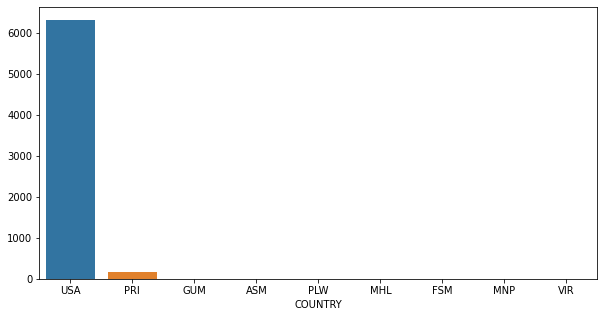

In [120]:
ax, fig = plt.subplots(figsize=(10, 5))

ax = sns.barplot(x=y, y=x, orient="v")

plt.show()

In [123]:
state = df["STATE"].value_counts().head(10)

In [124]:
x = state.values
y = state.index

In [131]:
for i, v in enumerate(x):
    print(v)

708
441
415
360
338
284
256
171
167
165


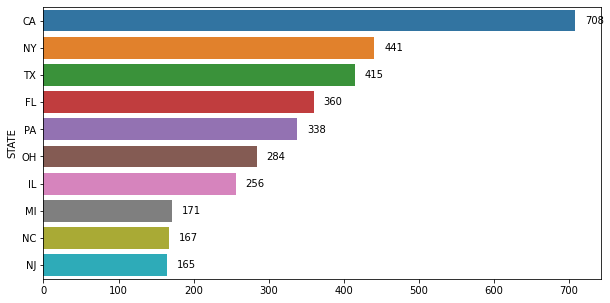

In [133]:
ax, fig = plt.subplots(figsize=(10, 5))

ax = sns.barplot(x=x, y=y)

for i, v in enumerate(x):
    ax.annotate(str(v), # Transformando o valor em str
                xy=(v, i),
                xytext=(10, 0),
                textcoords='offset points',
                va='center',
                fontsize=10)

plt.show()

In [49]:
a = df.groupby(["COUNTRY", "STATE"])["IPEDSID"] \
           .agg(["count"]).sort_values(by = "count",
                                       ascending = False)

In [110]:
a.groupby(level="COUNTRY").first()

,count
COUNTRY,
ASM,1
FSM,1
GUM,3
MHL,1
MNP,1
PLW,1
PRI,156
USA,708
VIR,1


In [111]:
a.index[0][1]

'CA'

In [106]:
a.index[58]

('VIR', 'VI')

In [135]:
df["CITY"].value_counts().head(10)

CITY
NEW YORK        84
CHICAGO         71
HOUSTON         64
LOS ANGELES     51
BROOKLYN        50
SAN ANTONIO     43
MIAMI           42
SAN DIEGO       36
PHILADELPHIA    35
ATLANTA         34
Name: count, dtype: int64

In [165]:
student_amount = df.groupby(["STATE", "NAME"])["POPULATION"] \
                   .agg(["sum"]).sort_values(by = "sum",
                                             ascending = False).head(9)

In [147]:
df.head(3)

,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STFIPS,COFIPS,SECTOR,LEVEL_,HI_OFFER,DEG_GRANT,LOCALE,CLOSE_DATE,MERGE_ID,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
0,11,133872,ADVENTHEALTH UNIVERSITY,671 WINYAH DRIVE,ORLANDO,FL,32803,NOT AVAILABLE,(407) 303-7742,2,A,2259,ORANGE,12095,USA,28.576142,-81.367687,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/collegenavigator/?id=133872,2009-10-13T00:00:00Z,IMAGERY/OTHER,2015-10-16T00:00:00Z,www.ahu.edu/,12,095,2,1,13,1,11,-2,-2,FLORIDA HOSPITAL COLLEGE,26,2,1032,770,1802,1,174,457,NOT AVAILABLE
1,59,487445,FLORIDA CAREER COLLEGE-BOYNTON BEACH,1743 NORTH CONGRESS AVENUE,BOYNTON BEACH,FL,33426,8205,(561) 853-9941,3,A,723,PALM BEACH,12099,USA,26.542857,-80.092190,611210,JUNIOR COLLEGES,https://nces.ed.gov/collegenavigator/?id=487445,2018-02-13T00:00:00Z,IMAGERY/OTHER,2022-06-25T00:00:00Z,https://www.floridacareercollege.edu/,12,099,6,3,40,1,13,-2,-2,NOT AVAILABLE,-2,1,-999,681,681,2,-999,42,NOT AVAILABLE
2,75,450711,TREND BARBER COLLEGE,14806 ELLA BLVD.,HOUSTON,TX,77090,NOT AVAILABLE,(281) 440-8383,3,A,87,HARRIS,48201,USA,30.013146,-95.448402,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/collegenavigator/?id=450711,2018-02-13T00:00:00Z,IMAGERY/OTHER,2018-02-20T00:00:00Z,trendbarbercollege.com/,48,201,9,2,0,2,11,-2,-2,NOT AVAILABLE,-2,1,-999,74,74,2,-999,13,NOT AVAILABLE


In [166]:
student_amount

,,sum
STATE,NAME,
UT,WESTERN GOVERNORS UNIVERSITY,154991
NH,SOUTHERN NEW HAMPSHIRE UNIVERSITY,144645
PA,THE PENNSYLVANIA STATE UNIVERSITY,112931
AZ,GRAND CANYON UNIVERSITY,110404
VA,LIBERTY UNIVERSITY,100674
AZ,UNIVERSITY OF PHOENIX-ARIZONA,97248
OH,OHIO STATE UNIVERSITY-MAIN CAMPUS,96399
AZ,ARIZONA STATE UNIVERSITY CAMPUS IMMERSION,87678
TX,TEXAS A & M UNIVERSITY-COLLEGE STATION,81678


In [177]:
student_amount.reset_index()

,STATE,NAME,sum
0,UT,WESTERN GOVERNORS UNIVERSITY,154991
1,NH,SOUTHERN NEW HAMPSHIRE UNIVERSITY,144645
2,PA,THE PENNSYLVANIA STATE UNIVERSITY,112931
3,AZ,GRAND CANYON UNIVERSITY,110404
4,VA,LIBERTY UNIVERSITY,100674
5,AZ,UNIVERSITY OF PHOENIX-ARIZONA,97248
6,OH,OHIO STATE UNIVERSITY-MAIN CAMPUS,96399
7,AZ,ARIZONA STATE UNIVERSITY CAMPUS IMMERSION,87678
8,TX,TEXAS A & M UNIVERSITY-COLLEGE STATION,81678


In [188]:
student_amount.index.str.split(",")

AttributeError: Can only use .str accessor with Index, not MultiIndex

ValueError: Could not interpret input 'student_amount'

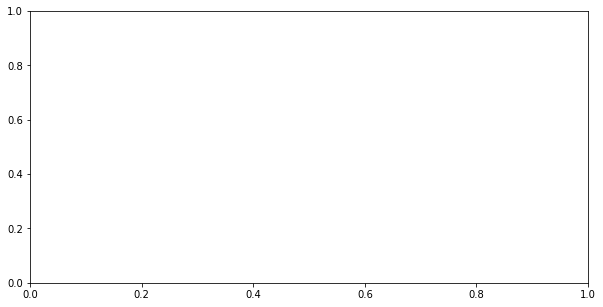

In [184]:
# Reset the index
student_amount_reset = student_amount.reset_index()

# Create a barplot
ax, fig = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='student_amount', y='NAME', hue='STATE', data=student_amount_reset)

plt.show()

In [24]:
# Quantidade de status 
# maior população
# agregação por cidade / estado
# quantidade de tipos